In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.io as sio
import copy
import pylab as pl
import time
from IPython import display

### Finding exact frequency by using Fourier Transforms  even the frequency resolution is not small enough 

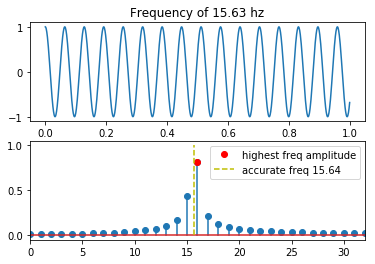

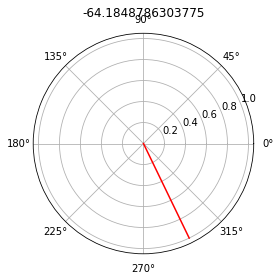

In [203]:
npnts = 1000
time = np.linspace(0, 1, npnts)
phase = (np.pi / 180) * 0 # phase in radians
f = 15.63 # frequency

signal = np.cos(2*np.pi * f * time + phase)

# plt.figure(figsize=(4,8))
plt.subplot(211)
plt.plot(time, signal)
plt.title('Frequency of {} hz'.format(f))


hz = np.linspace(0, npnts / 2, int(npnts / 2) + 1)
spectrum = scipy.fftpack.fft(signal)

spectrumAmplitude = np.abs(spectrum) / npnts * 2 

localMax = np.where( np.diff(np.sign(np.diff(spectrumAmplitude[:len(hz)]))) < 0)[0] + 1

ang = np.angle(spectrum[localMax[0]])

accurateFrequency = hz[localMax[0]] + hz[1] * ang / np.pi

plt.subplot(212)
plt.stem(hz, np.abs(spectrumAmplitude[:len(hz)]))
plt.plot(hz[localMax], spectrumAmplitude[localMax], 'ro', label='highest freq amplitude')
plt.plot([accurateFrequency,accurateFrequency], [0,1], 'y--', label='accurate freq {}'.format(np.round(accurateFrequency,2)))
plt.xlim([0, hz[localMax[-1]] * 2])
plt.legend()
plt.show()

plt.polar([0,ang],[0,1], 'r');
plt.title('{}'.format(ang / np.pi * 180))
plt.tight_layout()

In [159]:
np.squeeze(np.where( np.diff(np.sign(np.diff(spectrumAmplitude[:len(hz)]))) < 0))

array(2, dtype=int64)

In [4]:
start_freq = 770000
band_freq = 80000
duration = 0.0004
samples_one_second = 10000000
rate = samples_one_second / start_freq
sample = start_freq * rate
npnts = int(sample * duration)
light_speed = 300000

# d_max

In [25]:
# The Slope (S) of the chirp defines the rate at which the chirp ramps up.
S = band_freq / duration
print(S)
d_max = (samples_one_second * light_speed) / (2 * S)
# d_max = (npnts * light_speed) / (2 * S)
d_max

200000000.0


7500.0

In [26]:
# Min sample rate
km60 = 60
min_Fs = (km60 * S * 2) / light_speed
min_Fs

80000.0

### d_res

In [7]:
d_res = light_speed / (band_freq * 2)
d_res

1.875

In [18]:
distance_km = 16.8
f_IF = (S * 2 * distance_km) / light_speed
f_IF

22400.0

In [21]:
one_sinewave_distance = 1 / f_IF * distance_km
one_sinewave_distance

0.00075

In [17]:
band_freq * 1120 / 4000

22400.0

In [24]:
(300000 / 77000000000) * 1000

0.0038961038961038957